In [1]:
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

from keras.utils.vis_utils import plot_model

In [2]:
#Load Primary Data

In [3]:
mssql=pd.read_csv('H:/Datasets/CIC-DDoS2019/01-12/10percent/DrDos_MSSQL.csv', low_memory=False)

In [4]:
dns=pd.read_csv('H:/Datasets/CIC-DDoS2019/01-12/10percent/DrDos_DNS.csv', low_memory=False)

In [5]:
ldap=pd.read_csv('H:/Datasets/CIC-DDoS2019/01-12/10percent/DrDos_LDAP.csv', low_memory=False)

In [6]:
ntp=pd.read_csv('H:/Datasets/CIC-DDoS2019/01-12/10percent/DrDos_NTP.csv', low_memory=False)

In [7]:
netbios=pd.read_csv('H:/Datasets/CIC-DDoS2019/01-12/10percent/DrDos_NetBIOS.csv', low_memory=False)

In [8]:
SNMP=pd.read_csv('H:/Datasets/CIC-DDoS2019/01-12/10percent/DrDos_SNMP.csv', low_memory=False)

In [9]:
SSDP=pd.read_csv('H:/Datasets/CIC-DDoS2019/01-12/10percent/DrDos_SSDP.csv', low_memory=False)

In [10]:
UDP=pd.read_csv('H:/Datasets/CIC-DDoS2019/01-12/10percent/DrDos_UDP.csv', low_memory=False)

In [11]:
syn=pd.read_csv('H:/Datasets/CIC-DDoS2019/01-12/10percent/Syn.csv', low_memory=False)

In [12]:
TFTP=pd.read_csv('H:/Datasets/CIC-DDoS2019/01-12/10percent/TFTP.csv', low_memory=False)

In [13]:
UDPLag=pd.read_csv('H:/Datasets/CIC-DDoS2019/01-12/10percent/UDPLag.csv', low_memory=False)

In [ ]:
#Loading Secondary Data

ldap=ldap.concat(pd.read_csv('H:/Datasets/CIC-DDoS2019/03-11/10percent/LDAP.csv', low_memory=False))
mssql=mysql.concat(pd.read_csv('H:/Datasets/CIC-DDoS2019/03-11/10percent/MSSQL.csv', low_memory=False))
netbios=netbios.concat(pd.read_csv('H:/Datasets/CIC-DDoS2019/03-11/10percent/NetBIOS.csv', low_memory=False))
portmap = pd.read_csv('H:/Datasets/CIC-DDoS2019/03-11/10percent/Portmap.csv', low_memory=False)
syn=syn.concat(pd.read_csv('H:/Datasets/CIC-DDoS2019/03-11/10percent/Syn.csv', low_memory=False))
UDP=UDP.concat(pd.read_csv('H:/Datasets/CIC-DDoS2019/03-11/10percent/UDP.csv', low_memory=False))
UDPLag=UDPLag.concat(pd.read_csv('H:/Datasets/CIC-DDoS2019/03-11/10percent/UDPLag.csv', low_memory=False))

In [14]:
#df = pd.concat([UDPLag,UDP,syn,mssql,ldap,SNMP,dns,ntp,netbios,SSDP,TFTP])

df = pd.concat([UDPLag,UDP,syn,mssql,ldap,SNMP,dns,ntp,netbios,SSDP,TFTP])

In [15]:
print("LDAP= ",ldap.shape)
print("MSSQL= ",mssql.shape)
print("dns= ",dns.shape)
print("ntp= ",ntp.shape)
print("netbios= ",netbios.shape)
print("SNMP= ",SNMP.shape)
print("SSDP= ",SSDP.shape)
#print("Portmap= ",portmap.shape)
print("SYN= ",syn.shape)
print("UDP= ",UDP.shape)
print("TFTP= ",TFTP.shape)
print("UDPLag= ",UDPLag.shape)


#Free up memory
del UDPLag
del UDP
del syn
del mssql
del ldap
del SNMP
del dns
del ntp
del netbios
del SSDP
del TFTP

LDAP=  (218154, 89)
MSSQL=  (452449, 89)
dns=  (507441, 89)
ntp=  (121700, 89)
netbios=  (409498, 89)
SNMP=  (516137, 89)
SSDP=  (261137, 89)
SYN=  (158268, 89)
UDP=  (313680, 89)
TFTP=  (2010782, 89)
UDPLag=  (37060, 89)


In [16]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,5.006306e+06,5.006306e+06,5.006306e+06,5.006306e+06,5.006306e+06,5.006306e+06,5.006306e+06,5.006306e+06,5.006306e+06,5.006306e+06,...,5.006306e+06,5.006306e+06,5.006306e+06,5.006306e+06,5.006306e+06,5.006306e+06,5.006306e+06,5.006306e+06,5.006306e+06,5.006306e+06
mean,5.188400e+05,6.683008e+04,3.159877e+04,3.276592e+04,1.628403e+01,2.329543e+06,5.810839e+00,6.351310e-02,2.643170e+03,3.456606e+01,...,-4.978639e+07,7.586433e+02,7.691338e+02,2.055830e+03,3.739154e+02,2.268027e+05,7.325590e+04,3.363717e+05,1.537757e+05,9.958608e-01
std,5.523049e+05,9.052081e+04,2.750344e+04,1.896366e+04,2.715232e+00,1.086997e+07,2.372276e+02,3.068418e+00,7.269955e+03,1.034766e+04,...,2.245678e+08,5.943029e+04,4.390741e+04,1.054612e+05,4.973739e+04,2.154298e+06,8.243592e+05,3.209369e+06,1.562049e+06,6.420318e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.214510e+05,1.724400e+04,8.150000e+02,1.636100e+04,1.700000e+01,1.000000e+00,2.000000e+00,0.000000e+00,8.240000e+02,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.844720e+05,4.147100e+04,3.578700e+04,3.279800e+04,1.700000e+01,2.000000e+00,2.000000e+00,0.000000e+00,2.064000e+03,0.000000e+00,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,7.592048e+05,7.761300e+04,6.247000e+04,4.921400e+04,1.700000e+01,2.999651e+06,4.000000e+00,0.000000e+00,2.944000e+03,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,2.010781e+06,7.774270e+05,6.553200e+04,6.553500e+04,1.700000e+01,1.200000e+08,9.997800e+04,1.862000e+03,1.760000e+05,8.829488e+06,...,1.480000e+03,6.151289e+07,4.868047e+07,7.286843e+07,6.151289e+07,1.192194e+08,5.727195e+07,1.192194e+08,1.192194e+08,1.000000e+00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5006306 entries, 0 to 2010781
Data columns (total 89 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Unnamed: 0.1                  int64  
 2   Flow ID                       object 
 3    Source IP                    object 
 4    Source Port                  int64  
 5    Destination IP               object 
 6    Destination Port             int64  
 7    Protocol                     int64  
 8    Timestamp                    object 
 9    Flow Duration                int64  
 10   Total Fwd Packets            int64  
 11   Total Backward Packets       int64  
 12  Total Length of Fwd Packets   float64
 13   Total Length of Bwd Packets  float64
 14   Fwd Packet Length Max        float64
 15   Fwd Packet Length Min        float64
 16   Fwd Packet Length Mean       float64
 17   Fwd Packet Length Std        float64
 18  Bwd Packet Length Max 

In [18]:
print("columns: ", len(df.columns))
df.columns

columns:  89


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', 

In [19]:
df = df.rename(columns={' Label': 'Label'})

In [20]:
# Drop NaN values
print('There are {} columns and {} rows in the Layer 1 Data.'.format(len(df.columns), len(df)))
df.dropna(axis='index', inplace=True)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
print('After dropping NaN values, there are {} columns and {} rows in Layer 1 Data.\n\n'.format(len(df.columns), len(df)))

There are 89 columns and 5006306 rows in the Layer 1 Data.
After dropping NaN values, there are 89 columns and 4896589 rows in Layer 1 Data.




In [21]:
# Remove overfitting columns
overfitting_columns = ['Unnamed: 0', ' Source IP', ' Destination IP', ' Source Port', ' Destination Port', ' Timestamp', 'SimillarHTTP', 'Flow ID']
df.drop(labels=overfitting_columns, axis='columns', inplace=True)
#pd.set_option('display.max_columns', None)

In [22]:
print('After dropping overfitting columns: \n\t there are {} columns and {} rows'.format(len(df.columns), len(df)))

After dropping overfitting columns: 
	 there are 81 columns and 4896589 rows


In [23]:
print(df.columns)

Index(['Unnamed: 0.1', ' Protocol', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Vari

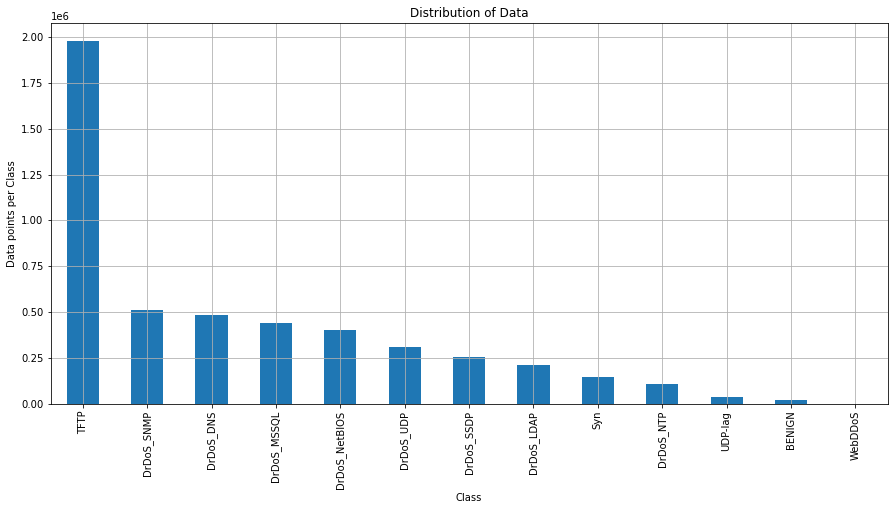

In [24]:
plt.figure(figsize=(15,7))
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Data')
plt.grid()
plt.show()

In [25]:
# Remove columns with only values of 0
#useless_columns = [' Bwd PSH Flags', ' Fwd URG Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Bwd URG Flags', 'FIN Flag Count',
#                   ' PSH Flag Count', ' ECE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate',
#                   ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
#df.drop(labels=useless_columns, axis='columns', inplace=True)
#print('After dropping columns with only 0 values: \n\t there are {} columns and {} rows'.format(len(df.columns),
#                                                                                                len(df)))


#removing columns where variation(std) is 0 
df=df.drop('Unnamed: 0.1',axis=1)
df=df.drop(' Fwd URG Flags',axis=1)
df=df.drop(' Bwd URG Flags',axis=1)
df=df.drop('FIN Flag Count',axis=1)
df=df.drop(' PSH Flag Count',axis=1)
df=df.drop(' ECE Flag Count',axis=1)
df=df.drop('Fwd Avg Bytes/Bulk',axis=1)
df=df.drop(' Fwd Avg Packets/Bulk',axis=1)
df=df.drop(' Fwd Avg Bulk Rate',axis=1)
df=df.drop(' Bwd Avg Bytes/Bulk',axis=1)
df=df.drop(' Bwd Avg Packets/Bulk',axis=1)
df=df.drop('Bwd Avg Bulk Rate',axis=1)

In [26]:
df['Label'].value_counts()

TFTP             1977115
DrDoS_SNMP        511374
DrDoS_DNS         483854
DrDoS_MSSQL       437587
DrDoS_NetBIOS     400236
DrDoS_UDP         309821
DrDoS_SSDP        255637
DrDoS_LDAP        212795
Syn               144172
DrDoS_NTP         108232
UDP-lag            36809
BENIGN             18951
WebDDoS                6
Name: Label, dtype: int64

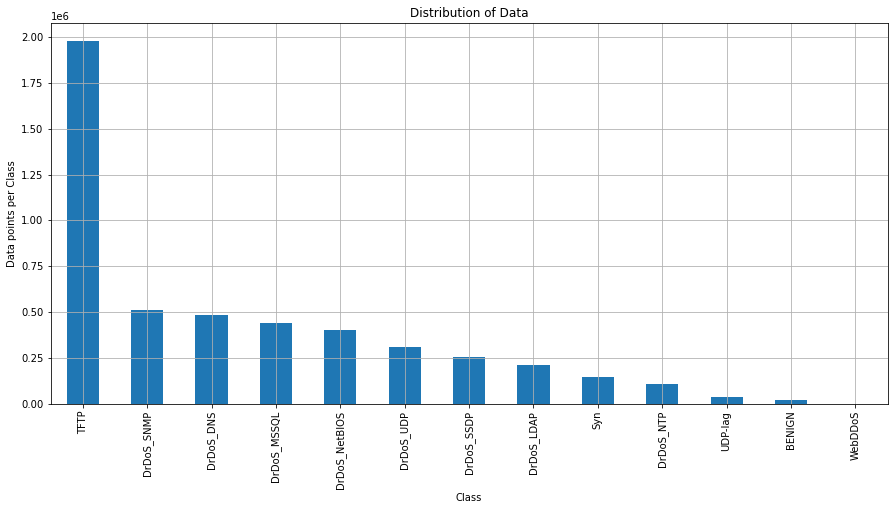

In [27]:
plt.figure(figsize=(15,7))
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Data')
plt.grid()
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

#drop na values and reset index
data_clean = df.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_clean['Label'].value_counts()

10    1977115
6      511374
1      483854
3      437587
5      400236
8      309821
7      255637
2      212795
9      144172
4      108232
11      36809
0       18951
12          6
Name: Label, dtype: int64

In [29]:
data_np = data_clean.to_numpy(dtype="float32")
data_np = data_np[~np.isinf(data_np).any(axis=1)]

del df

X = data_np[:, 0:67]

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,68:]).toarray()

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

In [31]:
X.shape

(4896589, 67)

In [32]:
Y.shape

(4896589, 15)

In [33]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(3672441, 67)
(3672441, 15)
(1224148, 67)
(1224148, 15)


In [34]:
data_clean.columns

Index(['index', ' Protocol', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       ' SYN Flag Count', ' RST Flag Count'

In [39]:
df=data_clean

In [40]:
#df['Label'] = df['Label'].replace('DrDoS_LDAPBENIGN', 'BENIGN')
#df['Label'] = df['Label'].replace('DrDoS_UDPBENIGN', 'BENIGN')
#df['Label'] = df['Label'].replace('BENIGNUDP', 'BENIGN')
#df['Label'] = df['Label'].replace('DrDoS_MSSQLBENIGN', 'BENIGN')
#df['Label'] = df['Label'].replace('BENIGNMSSQL', 'BENIGN')
#df['Label'] = df['Label'].replace('BENIGNNetBIOS', 'BENIGN')
#df['Label'] = df['Label'].replace('SynBENIGN', 'BENIGN')
#df['Label'] = df['Label'].replace('BENIGNSyn', 'BENIGN')
#df['Label'] = df['Label'].replace('BENIGNLDAP', 'BENIGN')

In [ ]:
print('num = ',len(df[' Source IP'].unique()))
df[' Source IP'].unique()

In [42]:
df

,index,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,0,17,1,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,11
1,1,17,1,2,0,778.0,0.0,389.0,389.0,389.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,11
2,2,17,2,2,0,750.0,0.0,375.0,375.0,375.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,11
3,3,17,2,2,0,738.0,0.0,369.0,369.0,369.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,11
4,4,17,1,2,0,750.0,0.0,375.0,375.0,375.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4896584,2010777,17,3099346,4,0,2064.0,0.0,516.0,516.0,516.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10
4896585,2010778,17,2998055,4,0,2064.0,0.0,516.0,516.0,516.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10
4896586,2010779,17,3001280,4,0,2064.0,0.0,516.0,516.0,516.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10
4896587,2010780,17,2992778,4,0,2064.0,0.0,516.0,516.0,516.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
a = df

In [ ]:
import netaddr 
ips = df[' Destination IP']
converted=[]
for i in range(len(ips)):
  converted.append(int(netaddr.IPAddress(ips[i])))
print("done")

In [ ]:
ips = df[' Source IP'].unique()
l = len(ips)
print('strating loop, length is',l)
for i in range(l):
  df[' Source IP'] = df[' Source IP'].replace(ips[i], int(netaddr.IPAddress(ips[i])))
print('loop over')

In [45]:
df['Flow Bytes/s'] = df['Flow Bytes/s'].astype('float')

In [47]:
#removing all the 0.0 correlation values
#df=df.drop(' Source IP',axis=1)
df=df.drop(' Flow Duration',axis=1)
df=df.drop(' Total Fwd Packets',axis=1)
df=df.drop(' Total Backward Packets',axis=1)
df=df.drop(' Total Length of Bwd Packets',axis=1)
df=df.drop(' Fwd Packet Length Std',axis=1)
df=df.drop(' Flow IAT Max',axis=1)
df=df.drop(' Flow IAT Min',axis=1)
df=df.drop('Fwd IAT Total',axis=1)
df=df.drop(' Fwd IAT Max',axis=1)
df=df.drop(' Fwd IAT Min',axis=1)
df=df.drop('Bwd IAT Total',axis=1)
df=df.drop(' Bwd IAT Mean',axis=1)
df=df.drop(' Bwd IAT Std',axis=1)
df=df.drop(' Bwd IAT Max',axis=1)
df=df.drop(' Bwd IAT Min',axis=1)
df=df.drop(' Fwd Header Length',axis=1)
df=df.drop(' Bwd Header Length',axis=1)
df=df.drop(' Bwd Packets/s',axis=1)
df=df.drop(' SYN Flag Count',axis=1)
df=df.drop(' Down/Up Ratio',axis=1)
df=df.drop(' Fwd Header Length.1',axis=1)
df=df.drop('Subflow Fwd Packets',axis=1)
df=df.drop(' Subflow Bwd Packets',axis=1)
df=df.drop(' Subflow Bwd Bytes',axis=1)
df=df.drop(' act_data_pkt_fwd',axis=1)
df=df.drop(' min_seg_size_forward',axis=1)
df=df.drop('Active Mean',axis=1)
df=df.drop(' Active Std',axis=1)
df=df.drop(' Active Max',axis=1)
df=df.drop(' Active Min',axis=1)
df=df.drop('Idle Mean',axis=1)
df=df.drop(' Idle Max',axis=1)
df=df.drop(' Idle Min',axis=1)
df = df.drop(' Packet Length Std',axis=1)

In [48]:
def clean_dataset(df):
    columns = df.columns
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [49]:
scaler = StandardScaler()

In [ ]:
import netaddr 
ips = df[' Destination IP'].unique()
l = len(ips)
print('strating loop, length is',l)
for i in range(l):
  df[' Destination IP'] = df[' Destination IP'].replace(ips[i], int(netaddr.IPAddress(ips[i])))
print('loop over')

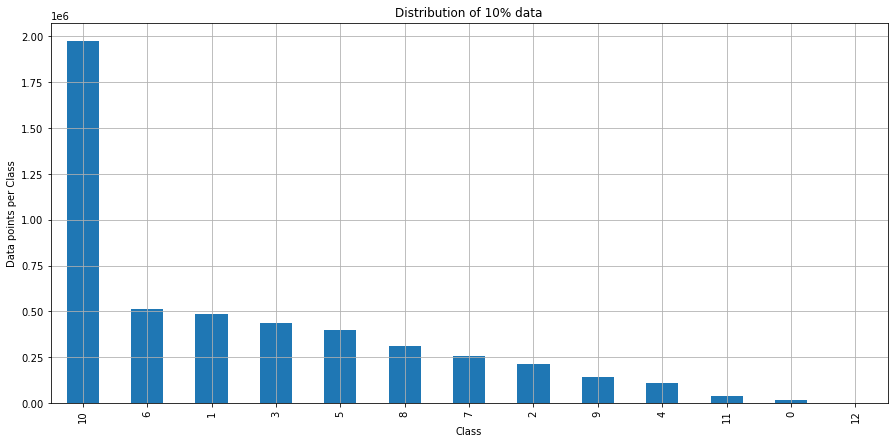

In [50]:
plt.figure(figsize=(15,7))
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of 10% data')
plt.grid()
plt.show()

In [51]:
ENCODING = 'utf-8'

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder



#drop na values and reset index
data_clean = df.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_clean['Label'].value_counts()

10    1977115
6      511374
1      483854
3      437587
5      400236
8      309821
7      255637
2      212795
9      144172
4      108232
11      36809
0       18951
12          6
Name: Label, dtype: int64

In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

# DNN

In [66]:
from keras.layers import Dropout, Activation

# Create neural net
model = Sequential()

model.add(Dense(128, input_dim=_features, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes))
model.add(Activation('softmax'))
model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=["accuracy"])


early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)

history = model.fit(X_train, Y_train,
                              batch_size=500,
                              epochs=30,
                              verbose=True,
                              validation_data=(X_test, Y_test),
                              callbacks=[reduce_lr, early_stop_callback])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               4864      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               33024     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_35 (Dense)            (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_36 (Dense)            (None, 15)               

In [67]:
import tensorflow.keras.backend as K
print('Learning Rate - ')
print(K.eval(model.optimizer.lr)) 
print('==================================')
model.summary()

Learning Rate - 
1e-04
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               4864      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               33024     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_35 (Dense)            (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_36 (Dense)            (N

In [69]:
# Measure accuracy
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

start = dt.datetime.now()

escore = model.evaluate(x_test, y_test, batch_size=32)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
#roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
#print("ROC-AUC score: {}".format(roc_auc_socre))

38255/38255 [==============================] - 23s 602us/step - loss: 44959236.0000 - accuracy: 0.9958


C:\Users\Maruata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maruata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Completed
Time taken: 0:00:41.452773
Validation score: 0.9957505138267595
Evaluation score: [44959236.0, 0.9957504868507385]
Recall score: 0.9957505138267595
Precision score: 0.9915523435463216
F1 Measure score: 0.9936469943765817


In [70]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [71]:
start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

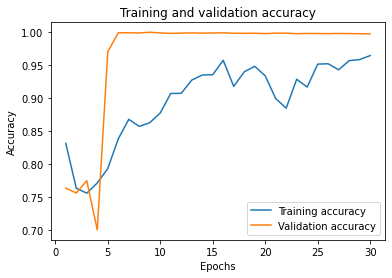

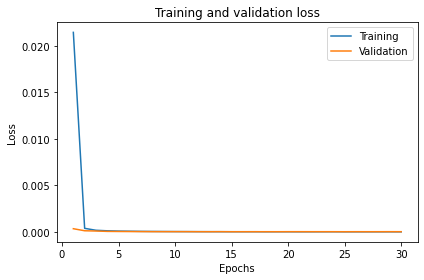

<Figure size 432x288 with 0 Axes>

In [72]:
plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
plt.clf()


plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()
plt.clf()

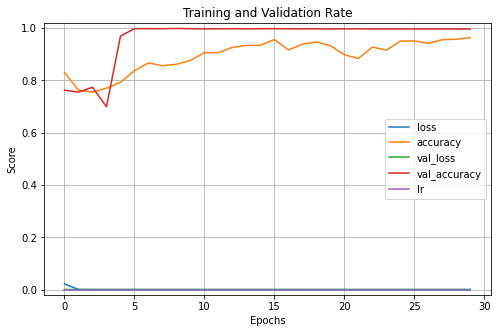

In [73]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-0.02,1.02)
plt.title('Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

# CNN

In [ ]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, Reshape
from sklearn import metrics
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
from hyperopt.plotting import main_plot_history, main_plot_vars
import uuid
import gc
from tensorflow import keras
import tensorflow as tf

K = keras.backend


# CNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, input_shape=(_features, 1)))
model.add(Activation('relu'))
model.add(Convolution1D(filters=256, kernel_size=6))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes))
model.add(Activation('softmax'))
model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)
    
history = model.fit(X_train, Y_train,
                              batch_size=500,
                              epochs=10,
                              verbose=True,
                              validation_data=(X_test, Y_test),
                              callbacks=[reduce_lr, early_stop_callback])  

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
best_loss = np.amin(history.history['val_loss']) 
print('Best loss: {}'.format(best_loss))
print('Balanced Acc loss: {}'.format(balanced_score))
    
    
import tensorflow.keras.backend as K
print('Learning Rate - ')
print(K.eval(model.optimizer.lr)) 
print('==================================')
model.summary()

In [80]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [ ]:
start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

In [ ]:
cf_matrix = confusion_matrix(y_test, pred)
sn.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

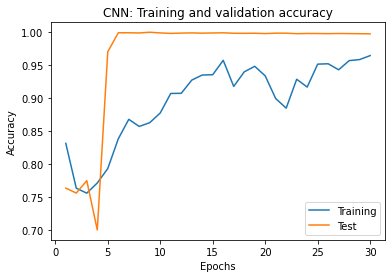

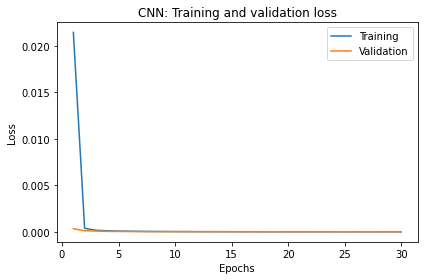

<Figure size 432x288 with 0 Axes>

In [82]:
start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('CNN: Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Test'], loc='lower right')

plt.show()
plt.clf()

#plt.subplot(212)

plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('CNN: Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()
plt.clf()


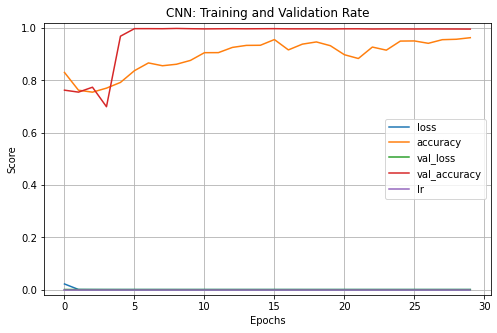

In [83]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-0.02,1.02)
plt.title('CNN: Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()